# Credit Card Fraud Detection

In [1]:
#pip install xgboost

In [2]:
#pip install imbalanced-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv('creditcard.csv')

## Pre-Processing and Cleaning

In [5]:
df.shape

(284807, 31)

Removing duplicate rows in the dataset

In [6]:
df= df.drop_duplicates()
df.shape

(283726, 31)

Check if there are any missing values in the dataset

In [7]:
df.isnull().values.sum()

0

Inspect the variables, their data types and their disctribution

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
#print(df.dtypes)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


The dataset variables V1 to V28 are already converted to principle components via PCA process to reduce dataset dimensionality. The Mean values of the data varialbes V1 to V28 is close to 0 and that shows they are already normalized. Applying scaler function to normalize the Amount varible. 

In [11]:
from sklearn.preprocessing import StandardScaler
df['Amount_Norm'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

Drop Amount varialbe as we are going to use the calculated normalized amount.<BR>
Drop Time variables as that is not going to be used for modelling purposes

In [12]:
df = df.drop(['Amount'],axis=1)
df = df.drop(['Time'],axis=1)

In [13]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Norm
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813


## Exploratory Data Analysis

Check the distribution of the predictor variable ( Class variable) to determine if the dataset is balanced or imbalanced. 

0    283253
1       473
Name: Class, dtype: int64

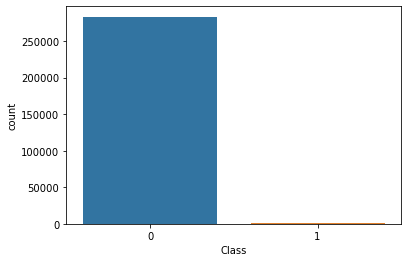

In [14]:
import seaborn as sns
sns.countplot(x="Class", data=df)
df.Class.value_counts()

As we can see the Class variable is highly imbalanced therefore we will try to balance the dataset using undersamplting ( Random Under Sampling) and oversampling techiniques ( SMOTE) and record out observation if the the performace of the model is affected by the treatment.

Check correlations among the varialbes to identify if we need to remove any highly correlated variables from the dataset. We wil plot a correlation heatmap for visulization. 

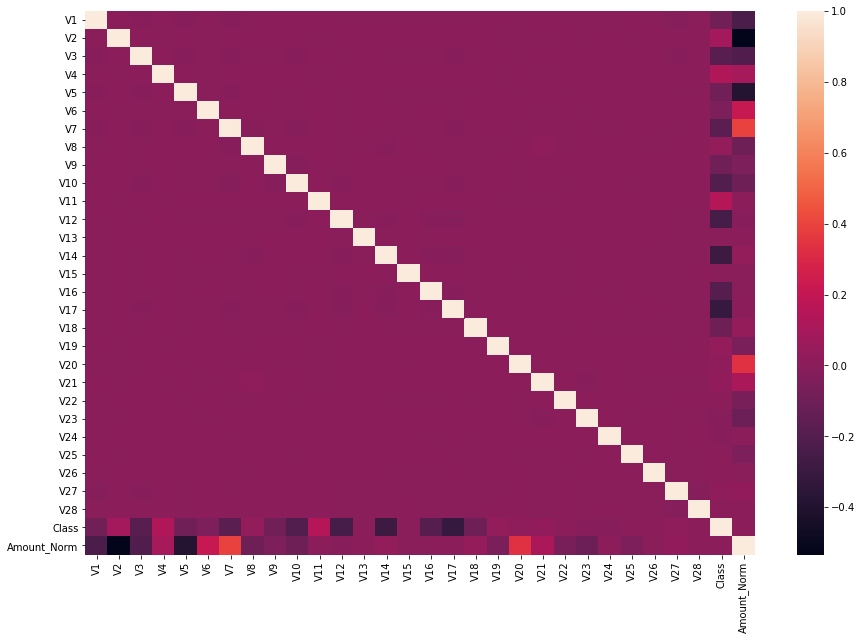

In [15]:
f, ax = plt.subplots(figsize=(15, 10))
corr= df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

Draw a histogram for the available variables to observer the distribution. 

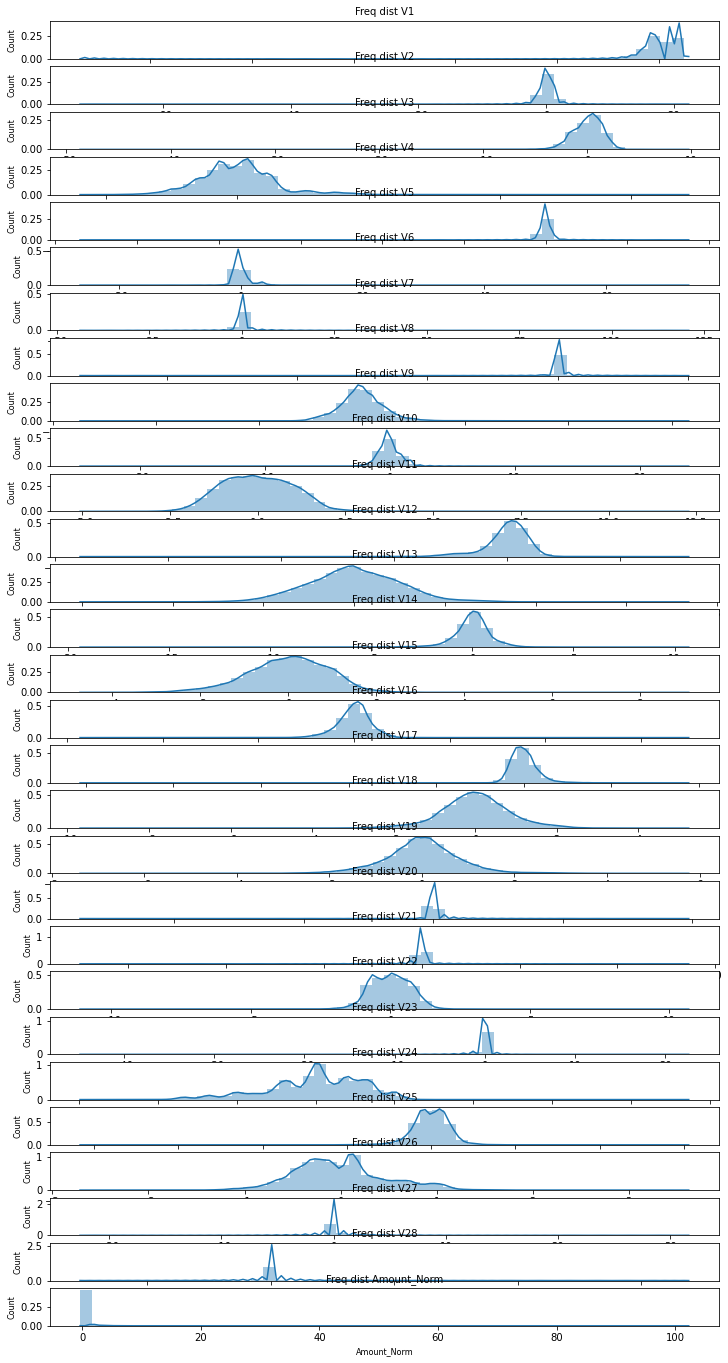

In [16]:
col_names  = [ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
              'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount_Norm']
fig, ax = plt.subplots(len(col_names), figsize=(12,24))
for i, col_val in enumerate(col_names):
    sns.distplot(df[col_val], ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

Split original dataset into training and test sets using Sklearn

In [17]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, df.columns != 'Class']
y = df.iloc[:, df.columns == 'Class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [18]:
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

X_train:  (198608, 29)
y_train:  (198608, 1)
X_test:  (85118, 29)
y_test:  (85118, 1)


Preparing data with Undersampling ( Using random Undersampling)

In [19]:
#pip install imbalanced-learn

In [20]:
import imblearn

In [21]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under,y_train_under=undersample.fit_resample(X_train, y_train)
X_test_under, y_test_under = X_test, y_test

print("X_train_under: ",X_train_under.shape)
print("y_train_under: ",y_train_under.shape)
print("X_test_under: ",X_test_under.shape)
print("y_test_under: ",y_test_under.shape)

X_train_under:  (688, 29)
y_train_under:  (688, 1)
X_test_under:  (85118, 29)
y_test_under:  (85118, 1)


In [22]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Norm
157273,1.952343,-1.154171,-0.468894,-0.730378,-0.941048,-0.196502,-0.985979,-0.096481,1.064679,0.450358,...,0.185681,-0.106499,-0.287121,0.231671,-0.563876,-0.511658,-0.526093,-0.035084,-0.042477,0.101947
85720,0.904494,-0.764023,-0.534697,0.350082,1.420277,4.058196,-0.921091,1.024173,0.564473,-0.096028,...,0.325037,0.170014,0.140781,-0.268877,1.028286,0.605264,-0.244661,0.039132,0.057791,0.325590
197131,1.996578,0.426378,-2.301651,1.379143,0.955115,-0.688165,0.488495,-0.127149,0.024250,-0.158313,...,-0.297972,-0.001034,0.131905,0.019990,0.551699,0.412266,-0.537795,-0.010612,-0.035405,-0.349333
58983,1.279970,-0.266108,-0.992069,-0.285321,1.883019,3.657542,-0.715670,0.900671,0.496412,-0.151072,...,-0.003480,-0.142442,-0.316956,-0.123535,1.063070,0.742956,0.453687,-0.014068,0.004009,-0.325411
191505,1.877653,-0.264576,-0.488413,1.200438,-0.263572,-0.128477,-0.330835,-0.020716,0.842726,0.158703,...,-0.108286,-0.127187,-0.393514,0.240654,-0.731220,-0.339169,-0.896416,0.047819,-0.020030,-0.093741


Preparing data with Oversampling ( Using SMOTE)

In [23]:
from imblearn.over_sampling import SMOTE
oversample= SMOTE(sampling_strategy='minority')
X_train_over,y_train_over=oversample.fit_resample(X_train, y_train)
X_test_over, y_test_over = X_test, y_test

print("X_train_over: ",X_train_over.shape)
print("y_train_over: ",y_train_over.shape)
print("X_test_over: ",X_test_over.shape)
print("y_test_over: ",y_test_over.shape)

X_train_over:  (396528, 29)
y_train_over:  (396528, 1)
X_test_over:  (85118, 29)
y_test_over:  (85118, 1)


## Data Modeling

#### Applying Random Forest classifier (Original Dataset)

In [24]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

In [25]:
random_forest.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [26]:
y_pred = random_forest.predict(X_test)

In [27]:
random_forest.score(X_test,y_test)

0.9995770577316196

In [28]:
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [29]:
cf_matrix = confusion_matrix(y_test,y_pred)

[[84983     6]
 [   30    99]]
Accuracy : 0.9995770577316196
Area Under Curve : 0.8836856315468459
Precision : 0.9428571428571428
Rcall : 0.7674418604651163
F1Scrore : 0.8461538461538461


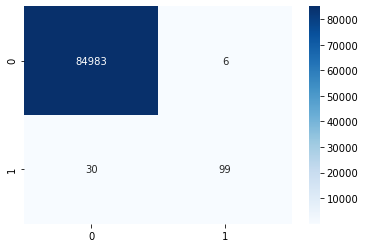

In [30]:
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')

# calculate accuracy
Accuracy_test = metrics.accuracy_score(y_test, y_pred)

# calculate auc
Aucs_test = metrics.roc_auc_score(y_test , y_pred)

#precision_calculation
Precision_test = metrics.precision_score(y_test , y_pred)

# calculate recall
Recall_test = metrics.recall_score(y_test , y_pred)

#calculating F1
F1Score_test = metrics.f1_score(y_test , y_pred)

print("Accuracy :", Accuracy_test)
print("Area Under Curve :", Aucs_test  )
print("Precision :",Precision_test)
print("Rcall :", Recall_test)
print("F1Scrore :", F1Score_test)

#### Applying Random Forest classifier (for Under Sampling Dataset)

In [31]:
random_forest.fit(X_train_under,y_train_under.values.ravel())

RandomForestClassifier()

In [32]:
y_pred_under = random_forest.predict(X_test_under)

In [33]:
cf_matrix_under = confusion_matrix(y_test_under,y_pred_under)

[[82424  2565]
 [   12   117]]
Accuracy : 0.9697243826217721
Area Under Curve : 0.9383981839510284
Precision : 0.0436241610738255
Rcall : 0.9069767441860465
F1Scrore : 0.0832443970117396


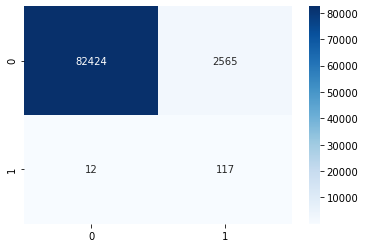

In [34]:
print(cf_matrix_under)
sns.heatmap(cf_matrix_under, annot=True, fmt='',cmap='Blues')

# calculate accuracy
Accuracy_test_under = metrics.accuracy_score(y_test_under, y_pred_under)

# calculate auc
Aucs_test_under = metrics.roc_auc_score(y_test_under , y_pred_under)

#precision_calculation
Precision_test_under = metrics.precision_score(y_test_under , y_pred_under)

# calculate recall
Recall_test_under = metrics.recall_score(y_test_under , y_pred_under)

#calculating F1
F1Score_test_under = metrics.f1_score(y_test_under , y_pred_under)

print("Accuracy :", Accuracy_test_under)
print("Area Under Curve :", Aucs_test_under  )
print("Precision :",Precision_test_under)
print("Rcall :", Recall_test_under)
print("F1Scrore :", F1Score_test_under)

#### Applying Random Forest classifier (for Over Sampling Dataset)

In [35]:
random_forest.fit(X_train_over,y_train_over.values.ravel())

RandomForestClassifier()

In [36]:
y_pred_over = random_forest.predict(X_test_over)

In [37]:
random_forest.score(X_test_over,y_test_over)

0.9994595737681806

[[84970    19]
 [   27   102]]
Accuracy : 0.9994595737681806
Area Under Curve : 0.8952370580378801
Precision : 0.8429752066115702
Rcall : 0.7906976744186046
F1Scrore : 0.816


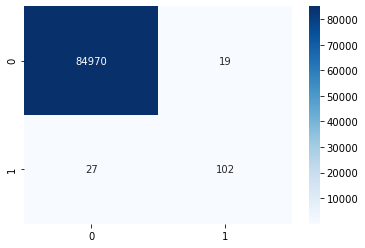

In [38]:
cf_matrix_over = confusion_matrix(y_test_over,y_pred_over)
print(cf_matrix_over)
sns.heatmap(cf_matrix_over, annot=True, fmt='', cmap='Blues')

# calculate accuracy
Accuracy_test_over = metrics.accuracy_score(y_test_over, y_pred_over)

# calculate auc
Aucs_test_over = metrics.roc_auc_score(y_test_over , y_pred_over)

#precision_calculation
Precision_test_over = metrics.precision_score(y_test_over , y_pred_over)

# calculate recall
Recall_test_over = metrics.recall_score(y_test_over , y_pred_over)

#calculating F1
F1Score_test_over = metrics.f1_score(y_test_over , y_pred_over)

print("Accuracy :", Accuracy_test_over)
print("Area Under Curve :", Aucs_test_over  )
print("Precision :",Precision_test_over)
print("Rcall :", Recall_test_over)
print("F1Scrore :", F1Score_test_over)

#### Logistic Regression (with Original Dataset)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train.values.ravel())
y_pred = logreg.predict(X_test)

[[84976    13]
 [   59    70]]
Accuracy : 0.9991541154632393
Area Under Curve : 0.7712413489716545
Precision : 0.8433734939759037
Rcall : 0.5426356589147286
F1Scrore : 0.6603773584905661


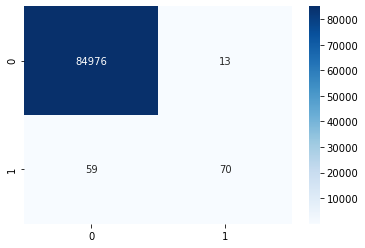

In [45]:
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')

# calculate accuracy
Accuracy_test = metrics.accuracy_score(y_test, y_pred)

# calculate auc
Aucs_test = metrics.roc_auc_score(y_test , y_pred)

#precision_calculation
Precision_test = metrics.precision_score(y_test , y_pred)

# calculate recall
Recall_test = metrics.recall_score(y_test , y_pred)

#calculating F1
F1Score_test = metrics.f1_score(y_test , y_pred)

print("Accuracy :", Accuracy_test)
print("Area Under Curve :", Aucs_test  )
print("Precision :",Precision_test)
print("Rcall :", Recall_test)
print("F1Scrore :", F1Score_test)

#### Logistic Regression (with undersample Dataset)

In [46]:
logreg.fit(X_train_under,y_train_under.values.ravel())
y_pred_under = logreg.predict(X_test_under)

[[81199  3790]
 [    9   120]]
Accuracy : 0.9553678422895274
Area Under Curve : 0.9428192759281844
Precision : 0.030690537084398978
Rcall : 0.9302325581395349
F1Scrore : 0.05942064867541472


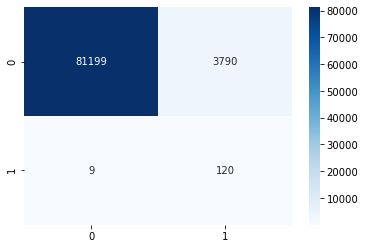

In [47]:
cf_matrix_under = confusion_matrix(y_test_under,y_pred_under)
print(cf_matrix_under)
sns.heatmap(cf_matrix_under, annot=True, fmt='',cmap='Blues')

# calculate accuracy
Accuracy_test_under = metrics.accuracy_score(y_test_under, y_pred_under)

# calculate auc
Aucs_test_under = metrics.roc_auc_score(y_test_under , y_pred_under)

#precision_calculation
Precision_test_under = metrics.precision_score(y_test_under , y_pred_under)

# calculate recall
Recall_test_under = metrics.recall_score(y_test_under , y_pred_under)

#calculating F1
F1Score_test_under = metrics.f1_score(y_test_under , y_pred_under)

print("Accuracy :", Accuracy_test_under)
print("Area Under Curve :", Aucs_test_under  )
print("Precision :",Precision_test_under)
print("Rcall :", Recall_test_under)
print("F1Scrore :", F1Score_test_under)

#### Logistic Regression (with Oversample Dataset)

In [48]:
logreg.fit(X_train_over,y_train_over.values.ravel())
y_pred_over = logreg.predict(X_test_over)

[[82790  2199]
 [   12   117]]
Accuracy : 0.9740242956836391
Area under Curve : 0.9405514037794768
Precision : 0.050518134715025906
Rcall : 0.9069767441860465
F1Scrore : 0.09570552147239264


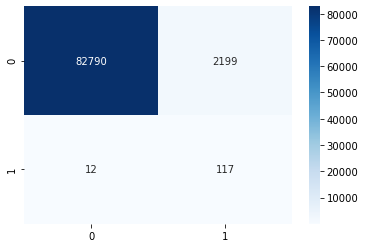

In [49]:
cf_matrix_over = confusion_matrix(y_test_over,y_pred_over)
print(cf_matrix_over)
sns.heatmap(cf_matrix_over, annot=True, fmt='', cmap='Blues')

# calculate accuracy
Accuracy_test_over = metrics.accuracy_score(y_test_over, y_pred_over)

# calculate auc
Aucs_test_over = metrics.roc_auc_score(y_test_over , y_pred_over)

#precision_calculation
Precision_test_over = metrics.precision_score(y_test_over , y_pred_over)

# calculate recall
Recall_test_over = metrics.recall_score(y_test_over , y_pred_over)

#calculating F1
F1Score_test_over = metrics.f1_score(y_test_over , y_pred_over)

print("Accuracy :", Accuracy_test_over)
print("Area under Curve :", Aucs_test_over  )
print("Precision :",Precision_test_over)
print("Rcall :", Recall_test_over)
print("F1Scrore :", F1Score_test_over)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test_over, y_pred_over))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84989
           1       0.05      0.91      0.10       129

    accuracy                           0.97     85118
   macro avg       0.53      0.94      0.54     85118
weighted avg       1.00      0.97      0.99     85118



#### Applying KNN Algorithm

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train.values.ravel())
y_pred = KNN.predict(X_test)

[[84976    13]
 [   59    70]]
Accuracy : 0.9994595737681806
Area Under Curve : 0.8642763710141786
Precision : 0.8952380952380953
Rcall : 0.7286821705426356
F1Scrore : 0.8034188034188035


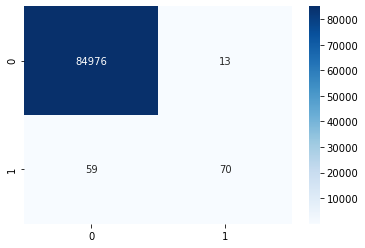

In [53]:
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')

# calculate accuracy
Accuracy_test = metrics.accuracy_score(y_test, y_pred)

# calculate auc
Aucs_test = metrics.roc_auc_score(y_test , y_pred)

#precision_calculation
Precision_test = metrics.precision_score(y_test , y_pred)

# calculate recall
Recall_test = metrics.recall_score(y_test , y_pred)

#calculating F1
F1Score_test = metrics.f1_score(y_test , y_pred)

print("Accuracy :", Accuracy_test)
print("Area Under Curve :", Aucs_test  )
print("Precision :",Precision_test)
print("Rcall :", Recall_test)
print("F1Scrore :", F1Score_test)

#### Apply XGBoost algorithm

In [ ]:
#pip install xgboost

In [54]:
from xgboost import XGBClassifier

In [56]:
XGB = XGBClassifier()
XGB.fit(X_train,y_train.values.ravel())
y_pred = XGB.predict(X_test)

[07:04:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[[84976    13]
 [   59    70]]
Accuracy : 0.9995888061279635
Area Under Curve : 0.8875616005390939
Precision : 0.9433962264150944
Rcall : 0.7751937984496124
F1Scrore : 0.851063829787234


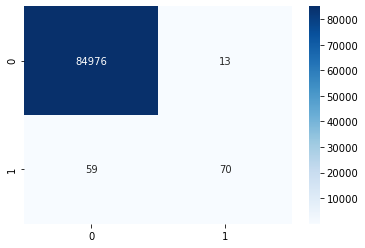

In [57]:
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')

# calculate accuracy
Accuracy_test = metrics.accuracy_score(y_test, y_pred)

# calculate auc
Aucs_test = metrics.roc_auc_score(y_test , y_pred)

#precision_calculation
Precision_test = metrics.precision_score(y_test , y_pred)

# calculate recall
Recall_test = metrics.recall_score(y_test , y_pred)

#calculating F1
F1Score_test = metrics.f1_score(y_test , y_pred)

print("Accuracy :", Accuracy_test)
print("Area Under Curve :", Aucs_test  )
print("Precision :",Precision_test)
print("Rcall :", Recall_test)
print("F1Scrore :", F1Score_test)

## Conclusion

Data imbalance poses a great challenge in builing an effective classification model. In this project we have used some differnet techiniques to treat data imbalance we will do a performance comparision of original dataset and the undersampled and oversampled dataset using Regression and Random forrest as the classification models. 

For this dataset accuracy alone will not be sufficient beause of the high class imbalance, therefore we will use F1 scroe for comparing the performance of these classification modeles. From comparing the results we observe that highest F1 score is achieved by Random Forest classification with the original dataset (.83) and Oversampled dataset (.82). Thefore we conclude that Ramdom Forrest classisfier gives better performance for this dataset. 